# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [44]:
from sklearn.cluster import KMeans

In [3]:
%matplotlib inline

### Loading the dataset

In [4]:
dataset = pd.read_excel('Dataset/customer_data.xlsx')

### View of the dataset

In [5]:
dataset.shape

(541909, 8)

Dataset consists of 541909 rows and 8 columns.

In [6]:
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
dataset.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Dataset Description

In [8]:
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Checking for Null Values

In [10]:
dataset.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We will take date of only 1 year to fit into out ML model. So we will find the last date of transaction in dataset and extract data of 1 year.

In [11]:
last_date = dataset['InvoiceDate'].dt.date.max()
last_date = pd.to_datetime(last_date)
print("The last date when transaction was recorded is",last_date.date())

The last date when transaction was recorded is 2011-12-09


In [12]:
start_date = last_date - pd.to_timedelta(365,unit='d')
print("Start Date of the transaction is",start_date.date())

Start Date of the transaction is 2010-12-09


We will take only thoe transactions which happen between 2010-12-09 and 2011-12-09.

In [13]:
df = dataset[dataset['InvoiceDate'] >= start_date]

In [14]:
df.shape

(522277, 8)

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
19632,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09 08:34:00,3.95,14243.0,United Kingdom
19633,537879,22835,HOT WATER BOTTLE I AM SO POORLY,8,2010-12-09 08:34:00,4.65,14243.0,United Kingdom
19634,537879,85150,LADIES & GENTLEMEN METAL SIGN,6,2010-12-09 08:34:00,2.55,14243.0,United Kingdom
19635,537879,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,4,2010-12-09 08:34:00,7.95,14243.0,United Kingdom
19636,537879,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-12-09 08:34:00,7.95,14243.0,United Kingdom


In [16]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


Resetting the index of rows in our new dataset 'df'.

In [17]:
df.reset_index(drop='True',inplace = True)

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09 08:34:00,3.95,14243.0,United Kingdom
1,537879,22835,HOT WATER BOTTLE I AM SO POORLY,8,2010-12-09 08:34:00,4.65,14243.0,United Kingdom
2,537879,85150,LADIES & GENTLEMEN METAL SIGN,6,2010-12-09 08:34:00,2.55,14243.0,United Kingdom
3,537879,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,4,2010-12-09 08:34:00,7.95,14243.0,United Kingdom
4,537879,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-12-09 08:34:00,7.95,14243.0,United Kingdom


In [19]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
522272,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522273,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522274,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522275,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
522276,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


Removing the timestamp from 'InvoiceDate' column.

In [20]:
df['InvoiceDate'] = df['InvoiceDate'].dt.date

C:\Users\Er.Shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09,3.95,14243.0,United Kingdom
1,537879,22835,HOT WATER BOTTLE I AM SO POORLY,8,2010-12-09,4.65,14243.0,United Kingdom
2,537879,85150,LADIES & GENTLEMEN METAL SIGN,6,2010-12-09,2.55,14243.0,United Kingdom
3,537879,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,4,2010-12-09,7.95,14243.0,United Kingdom
4,537879,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-12-09,7.95,14243.0,United Kingdom


In [22]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

Now the 'InvoiceDate' has been changed to object type. We need to convert it to date type.

In [23]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%Y-%m-%d')

C:\Users\Er.Shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [25]:
df.sort_values(by='InvoiceDate',inplace=True)

C:\Users\Er.Shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09,3.95,14243.0,United Kingdom
1923,538094,21547,CERAMIC BIRDHOUSE CRESTED TIT SMALL,6,2010-12-09,2.95,13117.0,United Kingdom
1924,538094,48116,DOORMAT MULTICOLOUR STRIPE,2,2010-12-09,7.95,13117.0,United Kingdom
1925,538094,22607,WOODEN ROUNDERS GARDEN SET,2,2010-12-09,9.95,13117.0,United Kingdom
1926,538094,22824,3 TIER SWEETHEART GARDEN SHELF,1,2010-12-09,35.95,13117.0,United Kingdom


### Checking for null values

In [27]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1385
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     128429
Country             0
dtype: int64

There are 1385 entries null in 'Description' column and 128429 entries null in 'CustomerID'. For our ML model 'CustomerID' is an important attribute as we can identify customers only by their 'CustomerID', so we can not take them into consideration. As our Dataset has 522277 rows, we can drop null entries of 'CustomerID'.

In [28]:
df.dropna(inplace=True,subset=['CustomerID'])

C:\Users\Er.Shiva\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df.shape

(393848, 8)

In [30]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

We have successfully removed null entries from our dataset.

## Calculating required values for our model
In our model, we are going to calculate 3 values based on which our model will divide the customers in their respective groups.
#### 1. Total_expenditure 
It is the total money spend by a customer in one year.
#### 2. Frequency
It is the number of times a customer bought something from the store in one year
#### 3. Recency
It is the number of days since the last transaction was made.

Now it is obvious, Columns 'StockCode','Description' and 'Country' are not necessary. So we will drop them out.

In [31]:
df.drop(labels = ['StockCode','Description','Country'],axis = 1,inplace = True)

C:\Users\Er.Shiva\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
df.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,537879,12,2010-12-09,3.95,14243.0
1923,538094,6,2010-12-09,2.95,13117.0
1924,538094,2,2010-12-09,7.95,13117.0
1925,538094,2,2010-12-09,9.95,13117.0
1926,538094,1,2010-12-09,35.95,13117.0


Now we are going to calculate 'Total_expenditure','Frequency' and 'Recency' in our dataset.

In [33]:
def getRecency(dates):
    return (last_date - dates.max()).days + 1

In [34]:
df = df.groupby(['CustomerID']).agg(
    {'UnitPrice' : 'sum','InvoiceNo' : 'count','InvoiceDate' : lambda x : (last_date - x.max()).days + 1}
    )

In [35]:
df.head()

,UnitPrice,InvoiceNo,InvoiceDate
CustomerID,,,
12346.0,2.08,2,326
12347.0,391.62,151,3
12348.0,178.71,31,76
12349.0,605.10,73,19
12350.0,65.30,17,311


In [36]:
df.rename(columns = {'UnitPrice':'Total_expenditure','InvoiceNo':'Frequency','InvoiceDate':'Recency'},inplace=True)

In [37]:
df.head()

,Total_expenditure,Frequency,Recency
CustomerID,,,
12346.0,2.08,2,326
12347.0,391.62,151,3
12348.0,178.71,31,76
12349.0,605.10,73,19
12350.0,65.30,17,311


## Behaviour of our Dataset

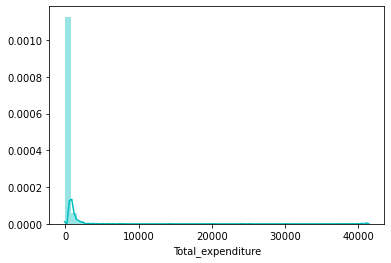

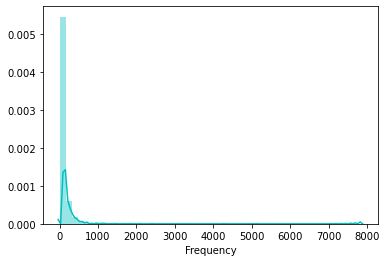

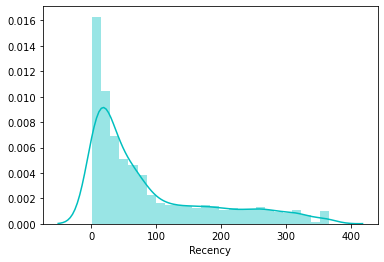

In [38]:
for column in df.columns:
    sb.distplot(df[column],color='c')
    plt.show()

From above visualizations, we come to know that our data is skewed. So we need to reduce the skewness of the data.
We will use log transformation to reduce skewness.

In [39]:
def getLog(x):
    l  = []
    for y in x:
        if y > 0:
            l.append(np.log(y))
        else:
            l.append(0)
    return l

In [40]:
for column in df.columns:
    df[column] = getLog(df[column])

In [41]:
df.head()

,Total_expenditure,Frequency,Recency
CustomerID,,,
12346.0,0.732368,0.693147,5.786897
12347.0,5.970292,5.017280,1.098612
12348.0,5.185764,3.433987,4.330733
12349.0,6.405394,4.290459,2.944439
12350.0,4.178992,2.833213,5.739793


Now we again check the distribution of the attributes.

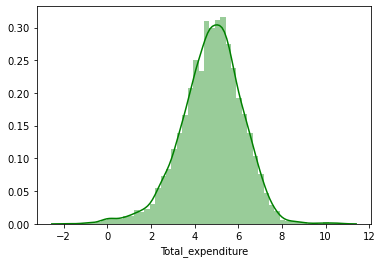

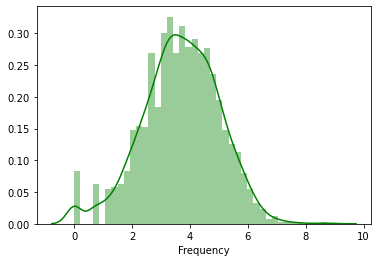

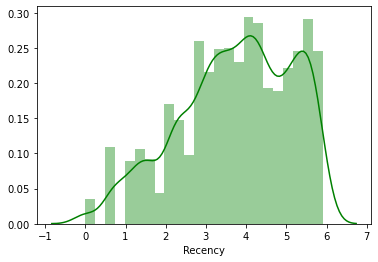

In [42]:
for column in df.columns:
    sb.distplot(df[column],color='g')
    plt.show()

It is obvious from the graph that the skewness is reduced from our dataset.

In [43]:
df.describe()

,Total_expenditure,Frequency,Recency
count,4307.000000,4307.000000,4307.000000
mean,4.777897,3.675518,3.735646
std,1.407376,1.331379,1.398528
min,-1.771957,0.000000,0.000000
25%,3.952203,2.833213,2.833213
50%,4.854527,3.713572,3.871201
75%,5.697429,4.595120,4.905275
max,10.630464,8.966867,5.902633


Now our data is prepared, we can fit our dataset into our ML Model and cluster the data.

## Fitting in ML Model (K-Means)

To cluster our customers, we will use <b>K-Means Machine Learning algorithm</b>. To do clustering efficiently, we need to know the optimal number of clusters. For this we will use <b>Elbow Method</b> to find the optimal number of clusters.

In [52]:
def optimal_clusters(df):
    '''
    We will computer average scores for clusters from 1 to 10.
    '''
    wcss = []
    for clusters in range(1,11):
        kmeans = KMeans(n_clusters = clusters,init = 'k-means++',random_state = 30)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
    return wcss

<b>Visualizing the avg score for each cluster

In [53]:
wcss = optimal_clusters(df)

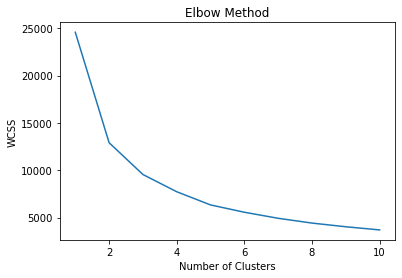

In [54]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

As it is obvious from the graph that optimal number of clusters is around 5. So we will do clustering taking number of clusters = 5.

## Training the KMeans model on the dataset

In [68]:
kmeans = KMeans(n_clusters = 5,init = 'k-means++',random_state = 30)

In [70]:
y_pred = kmeans.fit_predict(df)

In [71]:
print(y_pred)

[3 0 1 ... 4 0 2]


Assigning the clusters to their respective customers

In [76]:
df_new = df.assign(Cluster = y_pred)

In [77]:
df_new.head()

,Total_expenditure,Frequency,Recency,Cluster
CustomerID,,,,
12346.0,0.732368,0.693147,5.786897,3
12347.0,5.970292,5.017280,1.098612,0
12348.0,5.185764,3.433987,4.330733,1
12349.0,6.405394,4.290459,2.944439,2
12350.0,4.178992,2.833213,5.739793,1


In [79]:
df_new.tail()

,Total_expenditure,Frequency,Recency,Cluster
CustomerID,,,,
18280.0,3.863883,2.302585,5.627621,1
18281.0,3.672750,1.945910,5.198497,1
18282.0,4.138042,2.564949,2.079442,4
18283.0,7.107368,6.628041,1.386294,0
18287.0,4.649665,4.248495,3.761200,2


## Finding Average Expenditure of each cluster

In [95]:
d = df_new.loc[:,['Total_expenditure','Cluster']]

In [98]:
d

,Total_expenditure,Cluster
CustomerID,,
12346.0,0.732368,3
12347.0,5.970292,0
12348.0,5.185764,1
12349.0,6.405394,2
12350.0,4.178992,1
...,...,...
18280.0,3.863883,1
18281.0,3.672750,1
18282.0,4.138042,4


In [99]:
def antiLog(x):
    y = []
    for i in x:
        z = np.exp(i)
        y.append(z)
    return y

In [100]:
d['Total_expenditure'] = antiLog(d['Total_expenditure'])

In [110]:
d.reset_index(inplace = True)

In [111]:
d

,CustomerID,Total_expenditure,Cluster
0,12346.0,2.08,3
1,12347.0,391.62,0
2,12348.0,178.71,1
3,12349.0,605.10,2
4,12350.0,65.30,1
...,...,...,...
4302,18280.0,47.65,1
4303,18281.0,39.36,1
4304,18282.0,62.68,4
4305,18283.0,1220.93,0


In [113]:
d

,CustomerID,Total_expenditure,Cluster
0,12346.0,2.08,3
1,12347.0,391.62,0
2,12348.0,178.71,1
3,12349.0,605.10,2
4,12350.0,65.30,1
...,...,...,...
4302,18280.0,47.65,1
4303,18281.0,39.36,1
4304,18282.0,62.68,4
4305,18283.0,1220.93,0


In [114]:
d.drop(labels=['CustomerID'],axis = 1,inplace=True)

In [116]:
d.head()

,Total_expenditure,Cluster
0,2.08,3
1,391.62,0
2,178.71,1
3,605.10,2
4,65.30,1


In [118]:
d.groupby('Cluster').agg({'Total_expenditure':lambda x : (sum(x) / len(x))})

,Total_expenditure
Cluster,
0,1077.232881
1,94.492065
2,377.696341
3,15.820630
4,104.742189


<b>Average annual expenditure of Customers cluster wise is as following
<li>
   Cluster 0 : 1077.232881
</li>
<li>
   Cluster 1 : 94.492065
</li>
<li>
   Cluster 2 : 377.696341
</li>
<li>
   Cluster 3 : 15.820630
</li>
<li>
   Cluster 4 : 104.742189
</li>
</b>


## Finding average frequency of each cluster

In [133]:
d = df_new.loc[:,['Frequency','Cluster']]

In [134]:
d.reset_index(inplace=True)
d.drop(['CustomerID'],axis = 1,inplace = True)

In [135]:
d.head()

,Frequency,Cluster
0,0.693147,3
1,5.017280,0
2,3.433987,1
3,4.290459,2
4,2.833213,1


In [136]:
d['Frequency'] = antiLog(d['Frequency'])
d.head()

,Frequency,Cluster
0,2.0,3
1,151.0,0
2,31.0,1
3,73.0,2
4,17.0,1


In [137]:
d.groupby('Cluster').agg({'Frequency':lambda x : (sum(x) // len(x))})

,Frequency
Cluster,
0,309.0
1,25.0
2,106.0
3,5.0
4,36.0


<b>Average frequency of Customers doing shopping per year cluster wise is as following
<li>
   Cluster 0 : 309
</li>
<li>
   Cluster 1 : 25
</li>
<li>
   Cluster 2 : 106
</li>
<li>
   Cluster 3 : 5
</li>
<li>
   Cluster 4 : 36
</li>
</b>


## Finding the days when last transaction was made Cluster-wise

In [144]:
d = df_new.loc[:,['Recency','Cluster']]
d.reset_index(inplace=True)
d.drop(['CustomerID'],axis = 1,inplace = True)
d['Recency'] = antiLog(d['Recency'])
d.groupby('Cluster').agg({'Recency': lambda x : (sum(x) // len(x))})

,Recency
Cluster,
0,9.0
1,170.0
2,67.0
3,147.0
4,17.0


<b>Average number of days when the last transaction was made cluster wise is as following
<li>
   Cluster 0 : 9 days
</li>
<li>
   Cluster 1 : 170 days
</li>
<li>
   Cluster 2 : 67 days
</li>
<li>
   Cluster 3 : 147 days
</li>
<li>
   Cluster 4 : 17 days
</li>
</b>


# Conclusion

From the above analysis, We can conclude following
<li><b>Cluster number 0 belongs to the customers who buy very frequently and in large amount.</b></li>
<li><b>Cluster number 2 and 4 belong to the customers who spend medium amount and are less frequent than cluster 0</b></li>
<li><b>Cluster 1 and 3 belong to customers who spend less amount and are very less frequent</b></li>

In [146]:
kmeans.fit_predict(np.array([12330,12345,234,20]).reshape(-1,1))

ValueError: n_samples=4 should be >= n_clusters=5